In [112]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Iris dataset

In [113]:
import numpy as np
import pandas as pd 

In [114]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [115]:
iris_l = "/kaggle/input/iris/Iris.csv"

In [116]:
iris_d = pd.read_csv(iris_l)

## Dataset Visualization

In [117]:
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style='white', color_codes=True)

In [118]:
iris_d.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [119]:
iris_d.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [120]:
iris_d["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [121]:
iris_d.shape

(150, 6)

In [122]:
iris_d.isnull().any().values

array([False, False, False, False, False, False])

In [123]:
print(iris_d.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


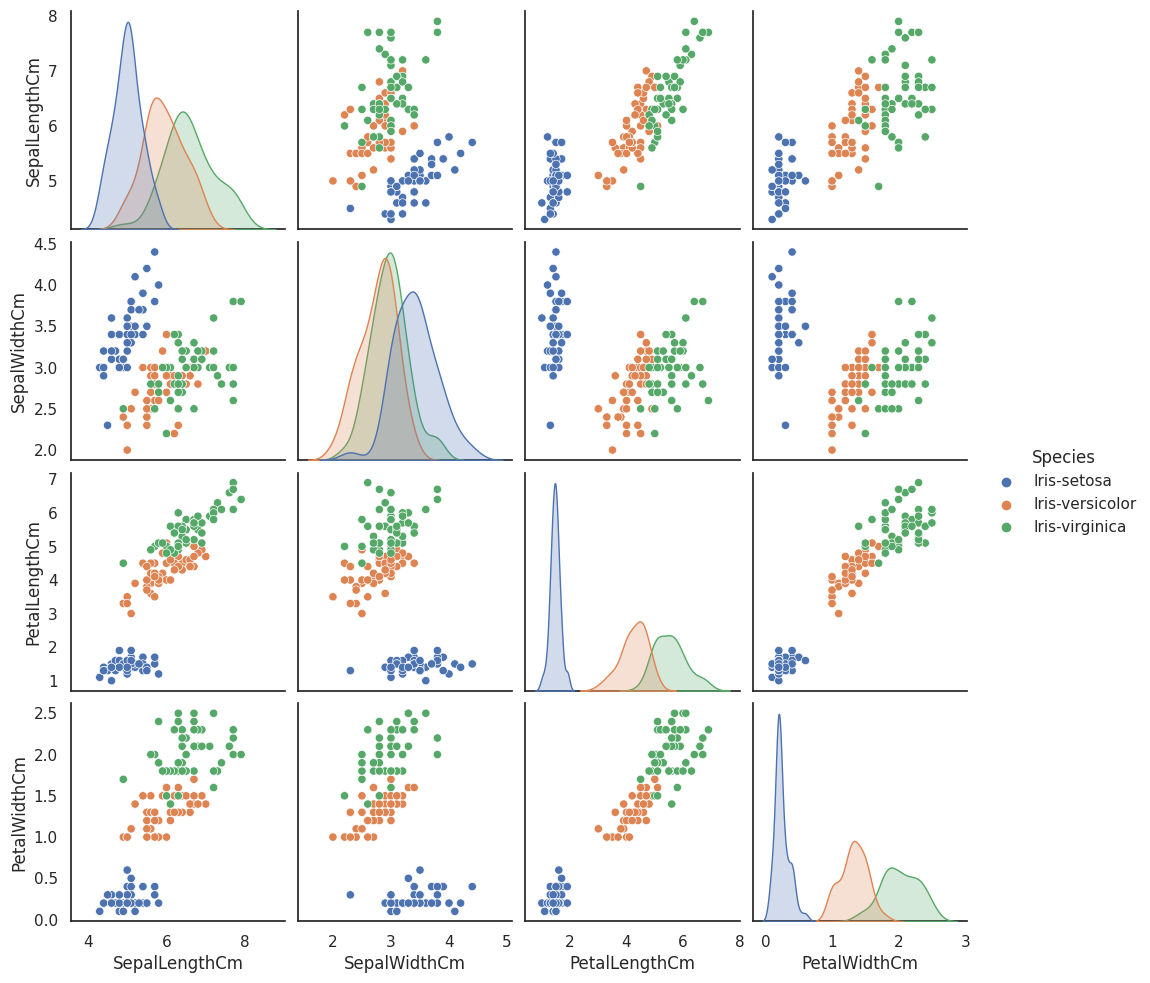

In [124]:
sns.pairplot(iris_d.drop("Id",axis=1),hue= "Species")

In [125]:
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## pre-process

In [126]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder

In [127]:
X = iris_d.drop(["Id","Species"], axis=1)
y = iris_d["Species"]

le = LabelEncoder()
y = le.fit_transform(y)  

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)


print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


In [128]:
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix

In [129]:
from sklearn import metrics

## General function 

In [130]:
def cm(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6)) 
    
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d",  
                xticklabels=dec_tree.classes_,  
                yticklabels=dec_tree.classes_)
    
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Class')
    
    plt.show()

In [131]:
def tfm(model, X_train, y_train):
    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)
    
    # accuracy = model.score(X_test,y_test)
    # precision = precision_score(y_test, y_pred, average = 'macro')

    # print(f"Accuracy: {accuracy:.4f}")
    # print(f"Precision: {precision:.4f}")

    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report['accuracy']
    
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    if accuracy < 1:
        cm(y_test, y_pred)

## Logistic Regression

In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
tfm(LogisticRegression(), X_train, y_train)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## SVM

In [134]:
from sklearn.svm import SVC


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



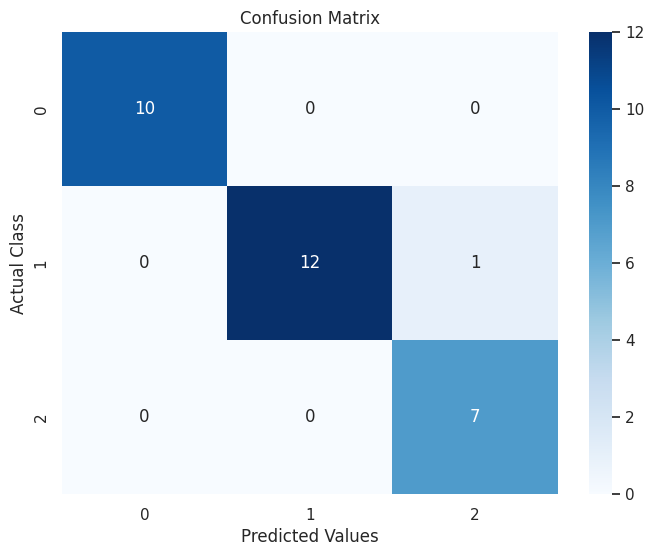

In [135]:
tfm(SVC(kernel = "linear"), X_train, y_train)

## Random Forest

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
tfm(RandomForestClassifier(n_estimators=100, random_state=42), X_train, y_train)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## KNN

In [138]:
from sklearn.neighbors import KNeighborsClassifier


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



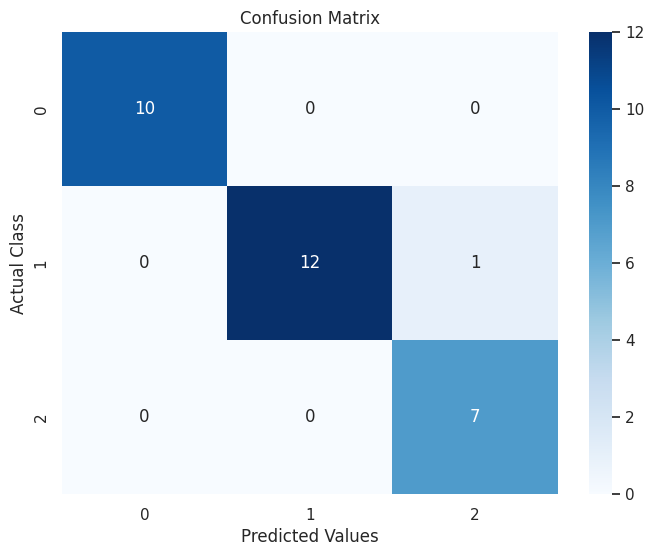

In [139]:
tfm(KNeighborsClassifier(), X_train, y_train)

In [140]:
knn_params = {"n_neighbors": np.arange(1,50)}

model = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

print("The best score: " + str(knn_cv.best_score_))
print("The best parameters: " + str(knn_cv.best_params_))

The best score: 0.975
The best parameters: {'n_neighbors': 11}


In [141]:
model = KNeighborsClassifier(3)
knn_tuned = model.fit(X_train, y_train)

knn_tuned.score(X_test, y_test)

0.9666666666666667

In [142]:
y_pred = knn_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9666666666666667

##  Decision Tree

In [143]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



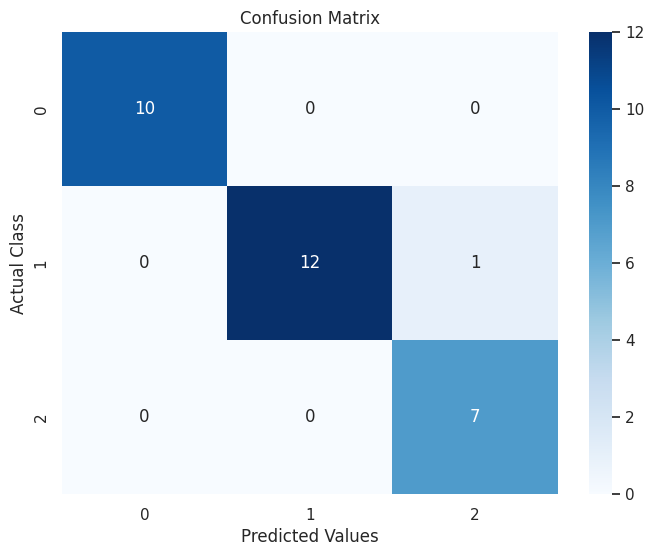

In [144]:
tfm(DecisionTreeClassifier(criterion="gini", max_depth=30, random_state=42) , X_train, y_train)